# Basic Analysis of the Dataset

After we have collected the data, we'll take a look at the basic distribution in our dataset to ensure it mirrors the real-world distributions.

Note that we haven't used any of this for training the model. This is just an overview of our dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import isodate
import seaborn as sns

In [5]:
df = pd.read_csv('FinalDataset.csv')

In [6]:
df.head()

,video_id,video_title,video_url,region_code,country,description,video_category_id,video_category_title,upload_date,upload_time,...,avg_comments_prev10,view_count,log_view_count,transcript,transcript_lang,view_range_ind,view_range_enc_ind,view_range_dep,view_range_enc_dep,upload_hour
0,_8AbQRNwDC8,"Holiday Movie Review: ""The Polar Express"", The...",https://www.youtube.com/watch?v=_8AbQRNwDC8,AU,CA,A Personal Commentary Review on the Classic Ho...,1.0,Film & Animation,21/12/2024,2025-07-14 00:28:55+00:00,...,8.5,1766.0,7.477038,What do I hear? Is that a train? Yes it is. ...,en,510–5K,1.0,380–5K,1.0,0.0
1,_FlnHuEYDKU,Harris gives message to supporters in first re...,https://www.youtube.com/watch?v=_FlnHuEYDKU,AU,Unknown,VP Harris and Gov. Walz thank grassroots suppo...,25.0,News & Politics,27/11/2024,2025-07-14 11:24:01+00:00,...,348.1,64494.0,11.074343,Vice President Kamala Harris and her running m...,en,5K–84K,2.0,5K–89K,2.0,11.0
2,_HQ_WnXewx4,types of headache 🤢🤮 with unique study...✍️🙏#e...,https://www.youtube.com/watch?v=_HQ_WnXewx4,AU,IN,types of headache 🤢🤮 with unique study...✍️🙏\n...,27.0,Education,22/12/2023,2025-07-14 14:50:00+00:00,...,92.6,8200709.0,15.919731,You,en,≥970K,4.0,≥1M,4.0,14.0
3,_KiF7KLVQxU,stop putting a bow on my tail.😑 #hazbinhotel #...,https://www.youtube.com/watch?v=_KiF7KLVQxU,GB,Unknown,NaN,24.0,Entertainment,22/05/2024,2025-07-14 21:24:14+00:00,...,13.2,1152610.0,13.957540,Angel? Angel! Why? Stop putting a bow on my...,en,≥970K,4.0,89K–1M,3.0,21.0
4,_oIUVEFNyM4,Experience the POWER of Mindfulness with Muddy...,https://www.youtube.com/watch?v=_oIUVEFNyM4,US,IN,Experience the POWER of Mindfulness with Muddy...,24.0,Entertainment,22/11/2024,2025-07-14 11:45:02+00:00,...,1.2,38.0,3.663562,Muddy Road. Tanzan and Aikido were walking on ...,en,<510,0.0,<380,0.0,11.0


In [7]:
df.columns

Index(['video_id', 'video_title', 'video_url', 'region_code', 'country',
       'description', 'video_category_id', 'video_category_title',
       'upload_date', 'upload_time', 'duration_type', 'video_duration',
       'duration_seconds', 'like_count', 'comment_count', 'channel_id',
       'channel_title', 'channel_url', 'subscriber_count', 'channel_size',
       'video_count', 'prev_video_count', 'avg_views_prev10',
       'avg_likes_prev10', 'avg_comments_prev10', 'view_count',
       'log_view_count', 'transcript', 'transcript_lang', 'view_range_ind',
       'view_range_enc_ind', 'view_range_dep', 'view_range_enc_dep',
       'upload_hour'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   video_id              502 non-null    object 
 1   video_title           527 non-null    object 
 2   video_url             527 non-null    object 
 3   region_code           527 non-null    object 
 4   country               527 non-null    object 
 5   description           463 non-null    object 
 6   video_category_id     500 non-null    float64
 7   video_category_title  500 non-null    object 
 8   upload_date           500 non-null    object 
 9   upload_time           500 non-null    object 
 10  duration_type         500 non-null    object 
 11  video_duration        500 non-null    object 
 12  duration_seconds      500 non-null    float64
 13  like_count            500 non-null    float64
 14  comment_count         500 non-null    float64
 15  channel_id            5

In [9]:
df.describe()

,video_category_id,duration_seconds,like_count,comment_count,subscriber_count,video_count,prev_video_count,avg_views_prev10,avg_likes_prev10,avg_comments_prev10,view_count,log_view_count,view_range_enc_ind,view_range_enc_dep,upload_hour
count,500.000000,500.000000,5.000000e+02,500.000000,5.000000e+02,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,500.000000,473.000000,473.000000,473.000000
mean,20.216000,694.852000,6.013708e+04,1506.744000,4.181916e+06,1509.794000,630.620000,1.179154e+06,2.693063e+04,695.496028,2.816773e+06,9.727539,2.010571,2.021142,12.712474
std,8.397761,1157.768181,4.817419e+05,8126.322115,3.153903e+07,13615.031043,1737.874906,1.003232e+07,2.333950e+05,5686.240639,2.018006e+07,4.158572,1.432778,1.377627,5.817656
min,1.000000,5.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,1.000000,7.777778e-01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,17.000000,55.750000,1.675000e+01,0.000000,2.020000e+03,59.750000,86.000000,6.607250e+02,8.600000e+00,0.700000,6.445000e+02,6.470017,1.000000,1.000000,9.000000
50%,22.000000,422.500000,4.020000e+02,15.500000,2.550000e+04,205.000000,228.000000,5.727100e+03,1.094000e+02,7.250000,1.595350e+04,9.677496,2.000000,2.000000,14.000000
75%,27.000000,760.750000,8.754250e+03,426.750000,9.680000e+04,529.750000,587.750000,7.785725e+04,1.573900e+03,91.025000,6.568490e+05,13.395199,3.000000,3.000000,17.000000
max,36.000000,11447.000000,7.543575e+06,114780.000000,4.010000e+08,237231.000000,20000.000000,1.274832e+08,2.968394e+06,116394.800000,3.095378e+08,19.550591,4.000000,4.000000,23.000000


## Duration Distribution

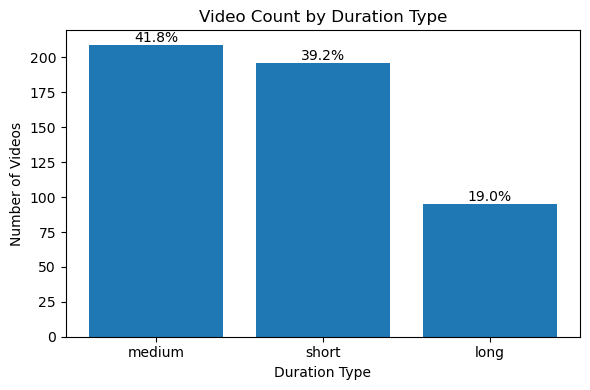

In [22]:
duration_counts = df['duration_type'].value_counts()   # Number of videos per duration type

plt.figure(figsize=(6, 4))
bars = plt.bar(duration_counts.index, duration_counts.values)

duration_percent = (duration_counts / duration_counts.sum()) * 100   # Percentage of videos per duration type
for bar, pct in zip(bars, duration_percent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=10)  # Print percentage on the bar plot
    
plt.xlabel('Duration Type', fontsize=10)
plt.ylabel('Number of Videos', fontsize=10)
plt.title('Video Count by Duration Type', fontsize=12)
plt.tight_layout()

plt.show()

## Channel Distribution

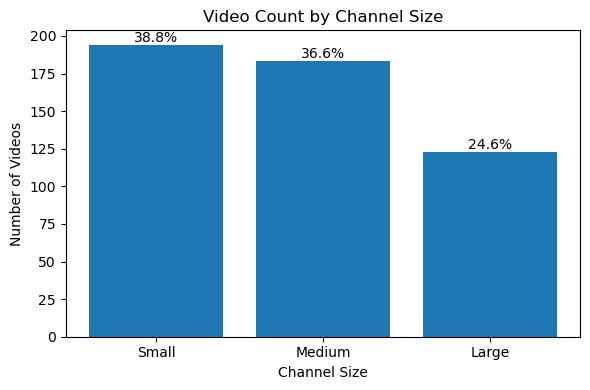

In [23]:
channel_counts = df['channel_size'].value_counts()

plt.figure(figsize=(6, 4))
bars = plt.bar(channel_counts.index, channel_counts.values)

channel_percent = (channel_counts / channel_counts.sum()) * 100
for bar, pct in zip(bars, channel_percent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=10)
    
plt.xlabel('Channel Size', fontsize=10)
plt.ylabel('Number of Videos', fontsize=10)
plt.title('Video Count by Channel Size', fontsize=12)
plt.tight_layout()

plt.show()

## Category Distribution

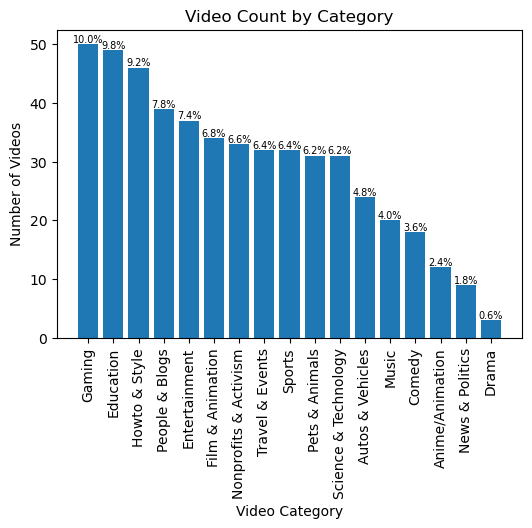

In [24]:
category_counts = df['video_category_title'].value_counts()

plt.figure(figsize=(6, 4))
bars = plt.bar(category_counts.index, category_counts.values)

category_percent = (category_counts / category_counts.sum()) * 100
for bar, pct in zip(bars, category_percent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=7)
    
plt.xlabel('Video Category', fontsize=10)
plt.ylabel('Number of Videos', fontsize=10)
plt.xticks(rotation=90)
plt.title('Video Count by Category', fontsize=12)

plt.show()

In [25]:
df['channel_id'].value_counts()  # Check the number of videos per channel

channel_id
UCkR6-NhSLZP03cFQBAyiCjw    3
UChLdxebSzTszhHwF-1CGgcA    3
UCDfdXzYssMFD_lQOrN5WXUg    3
UCsbTFPqHH_5YZ8v0tc4w7Dg    3
UCCyIfmrZWzEAVp7qx8rpxHQ    3
                           ..
UCGWsFWeq4OUIKgufFMTBEGQ    1
UCBiboZVMjoDOjzDWr_4NvDQ    1
UCLPUJfRzF-z3CuzBKRTnVaw    1
UCOxBZfCRcYLVSZZKbMWwdHw    1
UCOOyfrPZ-yQyxqIh8C_b-Jg    1
Name: count, Length: 361, dtype: int64

None of the channels have more than 3 videos in our dataset. This ensures we capture a variety of channels and categories.

In [26]:
# Lets create a column called upload_hour which mentions which hour during the day the video was uploaded. 

In [8]:
df['upload_hour'] = pd.to_datetime(df['upload_time']).dt.hour

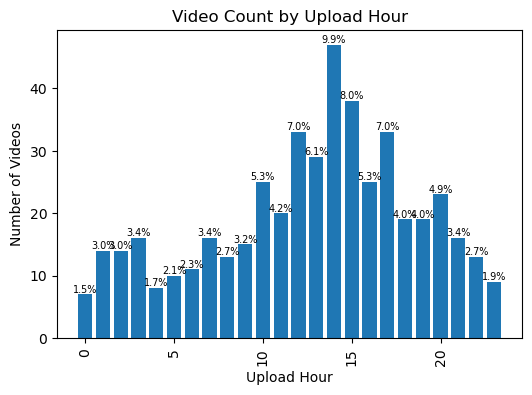

In [27]:
upload_hour_counts = df['upload_hour'].value_counts()

plt.figure(figsize=(6, 4))
bars = plt.bar(upload_hour_counts.index, upload_hour_counts.values)

upload_percent = (upload_hour_counts / upload_hour_counts.sum()) * 100
for bar, pct in zip(bars, upload_percent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=7)
    
plt.xlabel('Upload Hour', fontsize=10)
plt.ylabel('Number of Videos', fontsize=10)
plt.xticks(rotation=90)
plt.title('Video Count by Upload Hour', fontsize=12)

plt.show()

In [6]:
df.to_csv('FinalDataset.csv', index=False)

## Dataset for Regression

We will create a log_view_count column which can be used for regression analysis. 
<br>log_view_count is basically log(1+views).

In [ ]:
df = pd.read_csv('FinalDataset.csv')
df['log_view_count'] = np.log1p(df['view_count'])

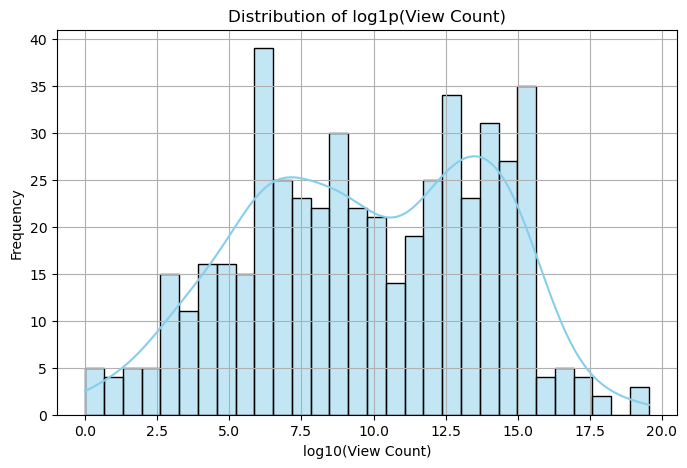

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df["log_view_count"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of log1p(View Count)")
plt.xlabel("log10(View Count)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
df.to_csv('FinalDataset', index=False)

### Dataset for Classification

For classification, we will be using view ranges derived from the dataset split (in a different file). Since we're splitting the dataset using two different methods, we will have two different columns - view_range_enc_ind and view_range_enc_dep.